In [8]:
!pip install pandas
!pip install numpy

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.dates as mdates

In [100]:
df = pd.read_excel('C:/Users/Sonko/Desktop/Стажи/project_1/COVID-19_ data_2020-2024.xlsx', sheet_name='Sheet1', header=0)

In [14]:
#countries sorted by GDP

df = df.copy()
df = df.dropna(subset=["continent"])
df = df[~df['total_cases'].isna()]


countrywise = pd.pivot_table(df, values = ['population','gdp_per_capita', 'total_deaths', 'total_cases'],
                             index = 'location', aggfunc = 'max')

countrywise['Mortality_rate'] = countrywise['total_deaths']*100/countrywise['total_cases']
countrywise['Infection_rate'] = countrywise['total_cases']*100/countrywise['population']
countrywise = countrywise.sort_values(by = 'gdp_per_capita', ascending = False)
countrywise.style.background_gradient(cmap = 'cubehelix')

,gdp_per_capita,population,total_cases,total_deaths,Mortality_rate,Infection_rate
location,,,,,,
Qatar,116935.600000,2695131,514524.000000,690.000000,0.134105,19.090872
Luxembourg,94277.960000,647601,393542.000000,1000.000000,0.254102,60.769208
Singapore,85535.380000,5637022,3006155.000000,2024.000000,0.067329,53.328779
Brunei,71809.250000,449002,347723.000000,179.000000,0.051478,77.443530
Ireland,67335.290000,5023108,1745088.000000,9744.000000,0.558367,34.741200
United Arab Emirates,67293.480000,9441138,1067030.000000,2349.000000,0.220144,11.301921
Kuwait,65530.540000,4268886,667290.000000,2570.000000,0.385140,15.631479
Norway,64800.060000,5434324,1512647.000000,5732.000000,0.378938,27.835054
Switzerland,57410.170000,8740471,4457868.000000,14170.000000,0.317865,51.002606


In [16]:
#countries sorted by infection rate

df = df.copy()
df = df.dropna(subset=["continent"])
df = df[~df['total_cases'].isna()]


countrywise = pd.pivot_table(df, values = ['population', 'population_density', 'total_deaths', 'total_cases'],
                             index = 'location', aggfunc = 'max')

countrywise['Mortality_rate'] = countrywise['total_deaths']*100/countrywise['total_cases']
countrywise['Infection_rate'] = countrywise['total_cases']*100/countrywise['population']
countrywise = countrywise.sort_values(by = 'Infection_rate', ascending = False)
countrywise.style.background_gradient(cmap = 'cubehelix')

,population,population_density,total_cases,total_deaths,Mortality_rate,Infection_rate
location,,,,,,
Cyprus,896007,127.660000,696410.000000,1451.000000,0.208354,77.723723
Brunei,449002,81.350000,347723.000000,179.000000,0.051478,77.443530
San Marino,33690,556.670000,25292.000000,126.000000,0.498181,75.072722
Austria,8939617,106.750000,6082444.000000,22534.000000,0.370476,68.039201
South Korea,51815808,527.970000,34571873.000000,35934.000000,0.103940,66.720706
Faroe Islands,53117,35.310000,34658.000000,28.000000,0.080789,65.248414
Slovenia,2119843,102.620000,1356582.000000,10083.000000,0.743265,63.994456
Gibraltar,32677,3457.100000,20550.000000,113.000000,0.549878,62.888270
Martinique,367512,nan,230354.000000,1104.000000,0.479262,62.679314


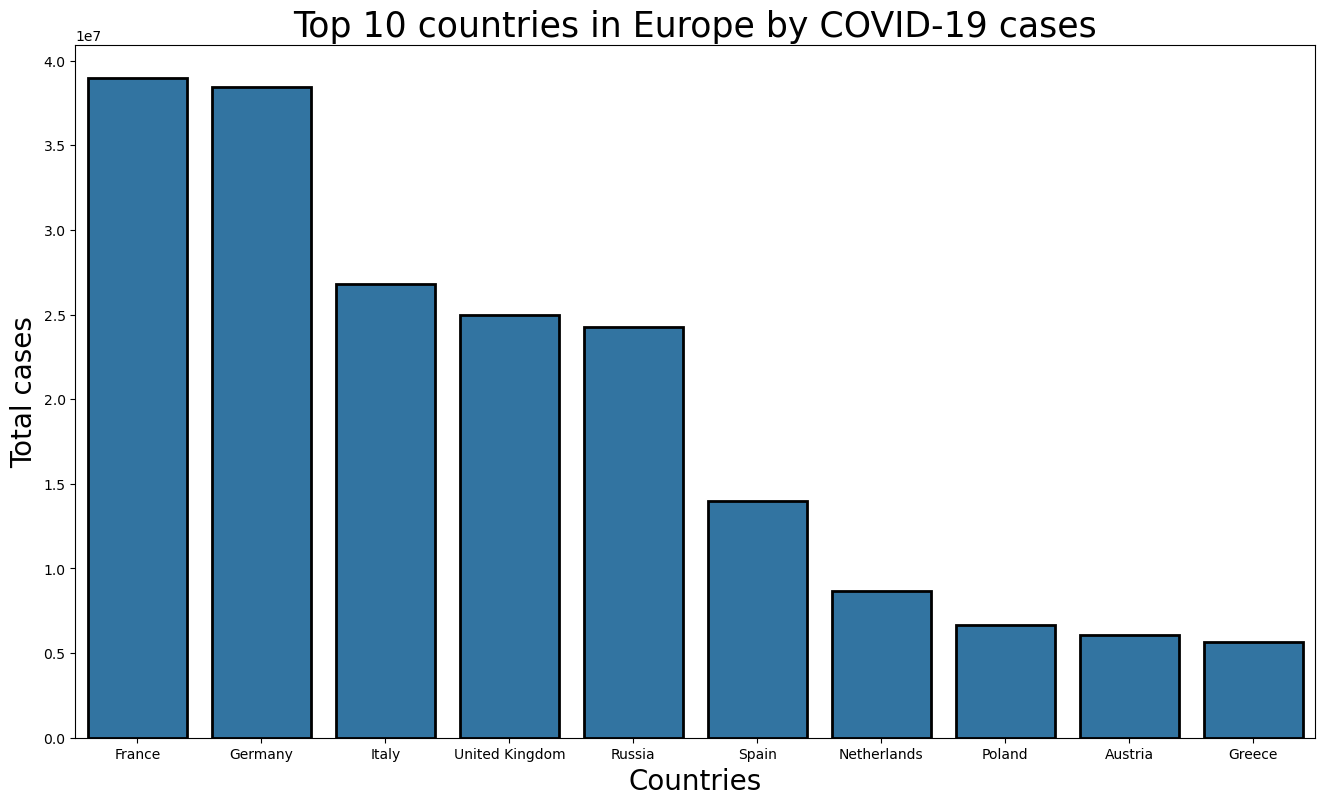

In [102]:
#Top 10 Europe countries by cases

df = df.copy()
df = df[df["continent"] == 'Europe']

top_10_countries = df.groupby(by = 'location').sum()[['new_cases', 'date']].sort_values(by = ['new_cases'], ascending = False).reset_index()
fig = plt.figure(figsize = (16, 9))
plt.title('Top 10 countries in Europe by COVID-19 cases', size = 25)
ax = sns.barplot(data = top_10_countries.iloc[:10], y = 'new_cases', x = 'location', linewidth = 2, edgecolor = 'black')

plt.xlabel('Countries', size = 20)
plt.ylabel('Total cases', size = 20)
plt.show()

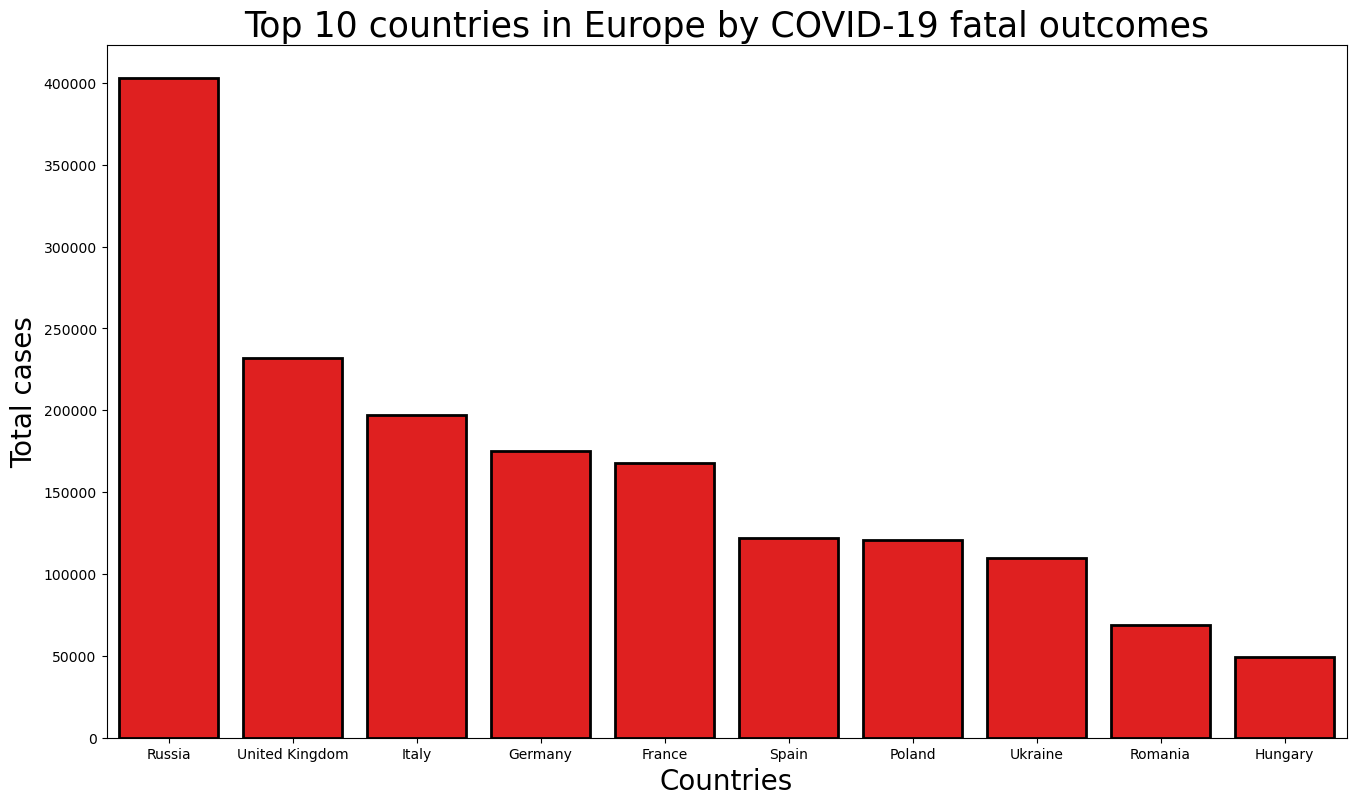

In [114]:
#Top 10 Europe countries by deaths

df = df.copy()
df = df[df["continent"] == 'Europe']

top_10_countries = df.groupby(by = 'location').sum()[['new_deaths', 'date']].sort_values(by = ['new_deaths'], ascending = False).reset_index()
fig = plt.figure(figsize = (16, 9))
plt.title('Top 10 countries in Europe by COVID-19 fatal outcomes', size = 25)
ax = sns.barplot(data = top_10_countries.iloc[:10], y = 'new_deaths', x = 'location', linewidth = 2, edgecolor = 'black', color = 'red')

plt.xlabel('Countries', size = 20)
plt.ylabel('Total cases', size = 20)
plt.show()

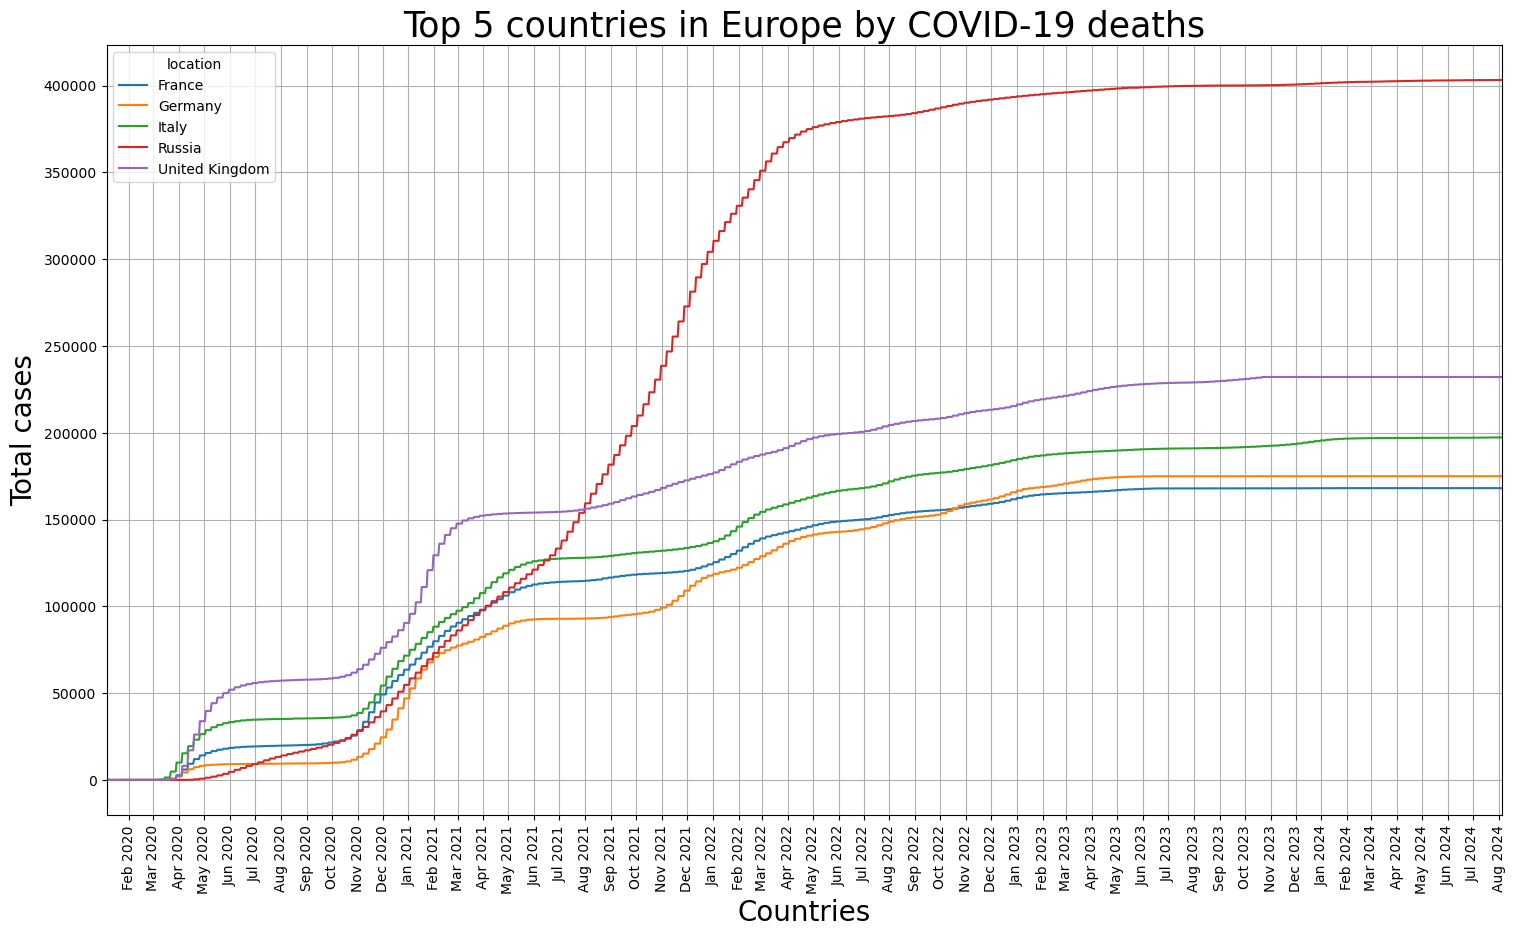

In [78]:
#countries by fatal outcome

df = df.copy()
df = df[df["continent"] == 'Europe']
df['date'] = pd.to_datetime(df['date'])


fig = plt.figure(figsize = (18, 10))
ax = sns.lineplot(data = df[df["location"].isin(['France', 'Germany', 'Italy', 'United Kingdom', 'Russia'])], x = 'date', y = 'total_deaths', hue = 'location')
ax.set_title('Top 5 countries in Europe by COVID-19 deaths', size = 25)
ax.set_xlim(pd.Timestamp('2020-01-05'), pd.Timestamp('2024-08-04'))

ax.xaxis.set_major_locator(mdates.MonthLocator())  # Отмечаем каждый месяц
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
plt.xticks(rotation=90)
plt.grid()

plt.xlabel('Countries', size = 20)
plt.ylabel('Total cases', size = 20)
plt.show()

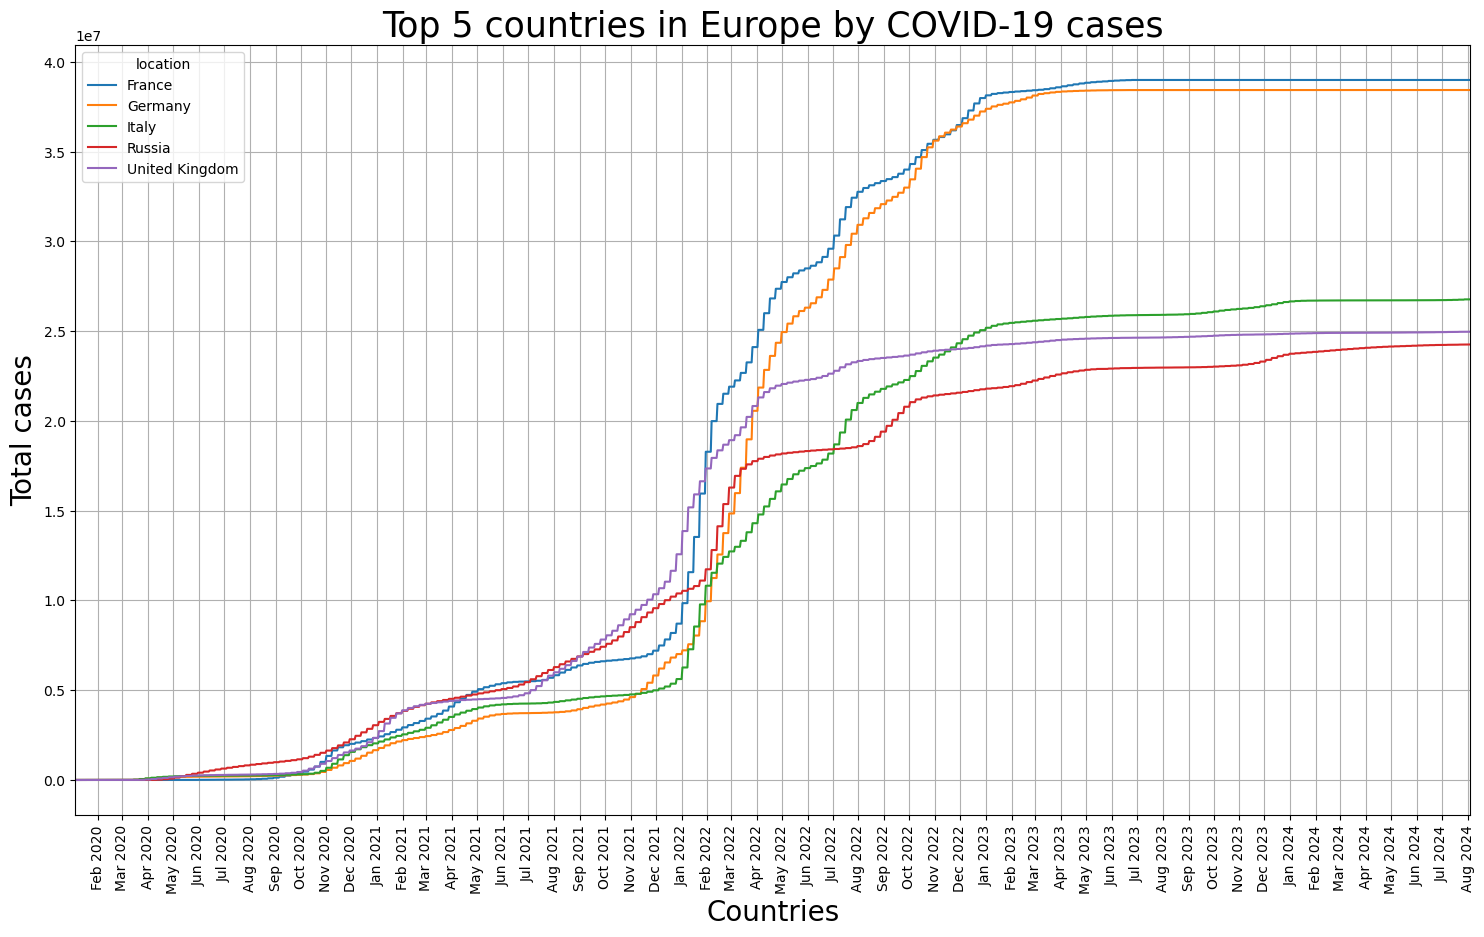

In [76]:
#countries by cases

df = df.copy()
df = df[df["continent"] == 'Europe']
df['date'] = pd.to_datetime(df['date'])


fig = plt.figure(figsize = (18, 10))
ax = sns.lineplot(data = df[df["location"].isin(['France', 'Germany', 'Italy', 'United Kingdom', 'Russia'])], x = 'date', y = 'total_cases', hue = 'location')
ax.set_title('Top 5 countries in Europe by COVID-19 cases', size = 25)
ax.set_xlim(pd.Timestamp('2020-01-05'), pd.Timestamp('2024-08-04'))

ax.xaxis.set_major_locator(mdates.MonthLocator())  # Отмечаем каждый месяц
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
plt.xticks(rotation=90)
plt.grid()

plt.xlabel('Countries', size = 20)
plt.ylabel('Total cases', size = 20)
plt.show()

In [72]:
def get_row(data, location, col_name):
    """Функция, извлекающая все данные
    заданного типа для заданной страны и соответствующие им даты
    """
    country_data = data[(data['location'] == location)]
    date = country_data["date"].to_numpy()
    
    dates_np = np.array([np.datetime64(d) for d in date])
    values_np = country_data[col_name].to_numpy()
    return dates_np, values_np

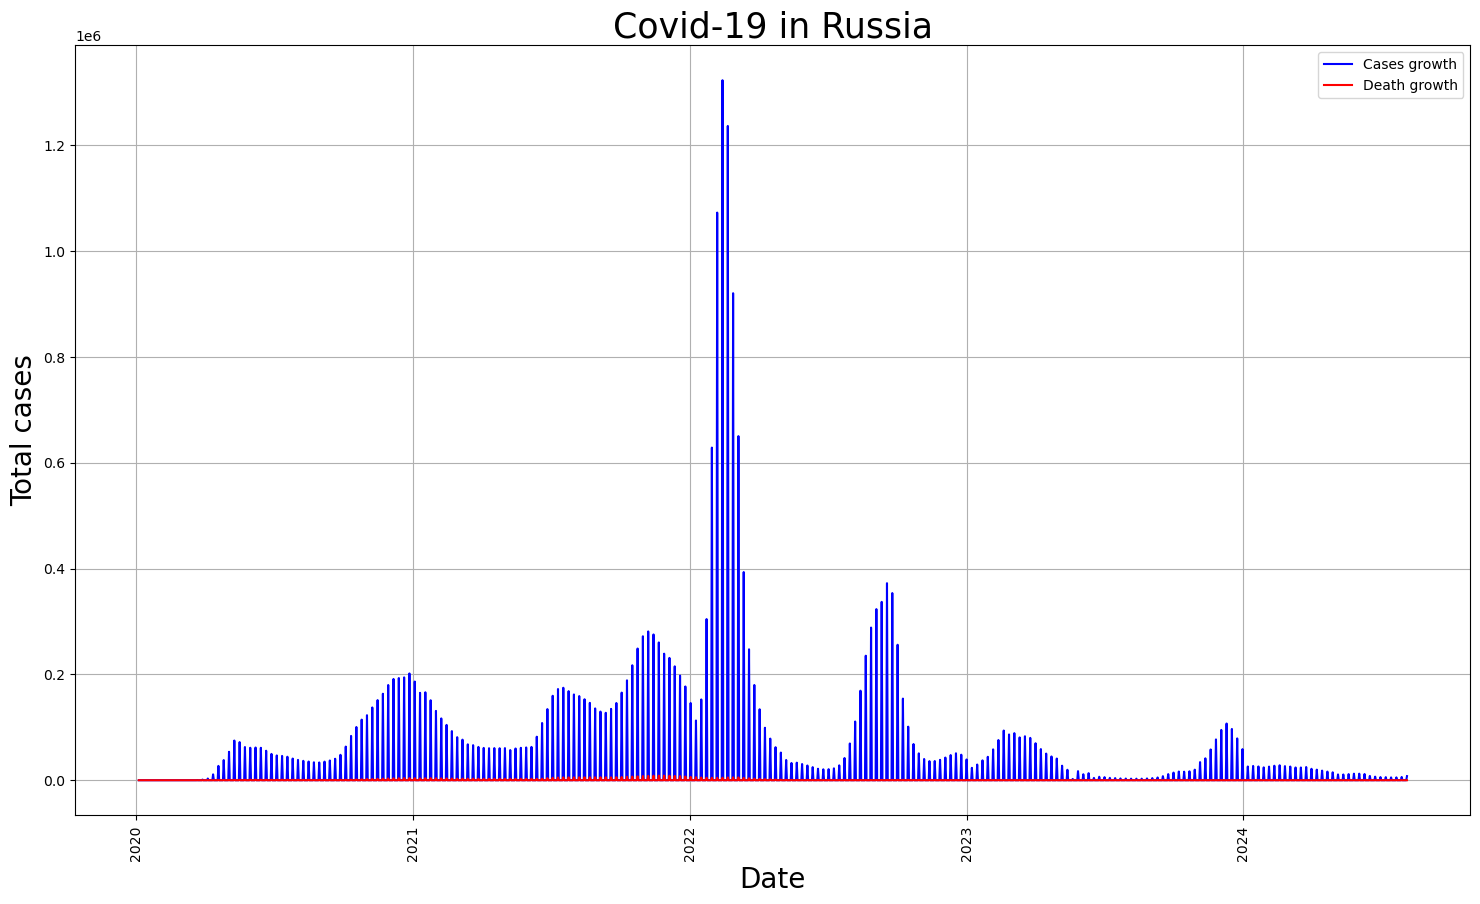

In [130]:
dates_confirmed, confirmed = get_row(df, "Russia", "new_cases")
dates_deaths, deaths = get_row(df, "Russia", "new_deaths")

fig = plt.figure(figsize = (18, 10))
plt.plot(dates_confirmed, confirmed, label="Cases growth", color="b")
plt.plot(dates_deaths, deaths, label="Death growth", color="#FF0000")

plt.title("Covid-19 in Russia", size = 25)
plt.xlabel("Date", size = 20) 
plt.ylabel("Total cases", size = 20) 
plt.xticks(rotation=90) 

plt.grid() 
plt.legend()
#plt.show()

In [82]:
df

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
3348,ALB,Europe,Albania,2020-01-05,2842318,0.0,0.0,NaN,0.0,0.0,...,7.1,51.2,NaN,2.89,78.57,0.8,NaN,NaN,NaN,NaN
3349,ALB,Europe,Albania,2020-01-06,2842318,0.0,0.0,NaN,0.0,0.0,...,7.1,51.2,NaN,2.89,78.57,0.8,NaN,NaN,NaN,NaN
3350,ALB,Europe,Albania,2020-01-07,2842318,0.0,0.0,NaN,0.0,0.0,...,7.1,51.2,NaN,2.89,78.57,0.8,NaN,NaN,NaN,NaN
3351,ALB,Europe,Albania,2020-01-08,2842318,0.0,0.0,NaN,0.0,0.0,...,7.1,51.2,NaN,2.89,78.57,0.8,NaN,NaN,NaN,NaN
3352,ALB,Europe,Albania,2020-01-09,2842318,0.0,0.0,NaN,0.0,0.0,...,7.1,51.2,NaN,2.89,78.57,0.8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416503,VAT,Europe,Vatican,2024-07-31,808,26.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,75.12,NaN,NaN,NaN,NaN,NaN
416504,VAT,Europe,Vatican,2024-08-01,808,26.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,75.12,NaN,NaN,NaN,NaN,NaN
416505,VAT,Europe,Vatican,2024-08-02,808,26.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,75.12,NaN,NaN,NaN,NaN,NaN
416506,VAT,Europe,Vatican,2024-08-03,808,26.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,75.12,NaN,NaN,NaN,NaN,NaN
